In [1]:
%run model.ipynb

/anaconda3/envs/nd/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/nd/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/nd/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
model.ipynb:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(2, 2, padding="same")`
  "metadata": {},
model.ipynb:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(2, 2, padding="same")`
  "import pandas as pd\n",


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
import sys
sys.path.append('../preparations/')

In [74]:
import x01_generate_notes
import x02_generate_midi
import x03_generate_wav
import x04_generate_wav_processed
import x05_generate_spectrogram
import x06_generate_label

In [75]:
!mkdir notes
!mkdir midi
!mkdir wav
!mkdir wav_processed
!mkdir spectrogram
!mkdir label
!rm ./notes/*
!rm ./midi/*
!rm ./wav/*
!rm ./wav_processed/*
!rm ./spectrogram/*
!rm ./label/*

mkdir: notes: File exists
mkdir: midi: File exists
mkdir: wav: File exists
mkdir: wav_processed: File exists
mkdir: spectrogram: File exists
mkdir: label: File exists


In [76]:
import numpy as np
import random

# this generates what time play what note and saves it to ./notes/

def generate_note_file():
    sound_id = ''.join(random.choice('0123456789ABCDEF') for i in range(16))
    
    t = 0
    note_time_array = []
    
    while t < 20:
        t += 2.0 + np.random.uniform(1.0)
        
        notes_in_this_chord = []
        
        if np.random.uniform() > 0.2:
            new_note = np.random.randint(24)
            if new_note not in notes_in_this_chord:
                note_time_array.append([t, new_note])
                notes_in_this_chord.append(new_note)
                
        if np.random.uniform() > 0.2:
            new_note = np.random.randint(24)
            if new_note not in notes_in_this_chord:
                note_time_array.append([t, new_note])
                notes_in_this_chord.append(new_note)
            
        if np.random.uniform() > 0.2:
            new_note = np.random.randint(24)
            if new_note not in notes_in_this_chord:
                note_time_array.append([t, new_note])
                notes_in_this_chord.append(new_note)
        
        if np.random.uniform() > 0.2 or (t > 18 and t < 20):
            new_note = np.random.randint(24)
            if new_note not in notes_in_this_chord:
                note_time_array.append([t, new_note])
                notes_in_this_chord.append(new_note)
                
#     print(note_time_array)
    np.save("./notes/" + sound_id, note_time_array)

In [77]:
generate_note_file()

In [78]:
import glob

# for every (time-note) file in ./notes, generate .mid file 

notes = glob.glob("./notes/*.npy")
print(len(notes))

for filename in notes:
    sound_id = filename[-20:-4]
    time_note_array = np.load(filename)
    time_array, note_array = np.transpose(time_note_array)
    x02_generate_midi.generate_midi_file(sound_id, time_array, np.array(note_array, dtype=int))

1


In [79]:
import glob

# for every .mid file generate the .wav file with fluidsynth

notes = glob.glob("./midi/*")
print(len(notes))
for filename in notes:
    x03_generate_wav.convert_midi_to_signal(filename)

1


In [80]:
# for every .wav file do some processing and generate another .wav file

files = glob.glob('./wav/*')
save_location = './wav_processed/'
print(len(files))
for filename in files:
    x04_generate_wav_processed.process_wav(filename, save_location)

1


In [81]:
import soundfile as sf
import sounddevice as sd

audio, sr = sf.read(files[0])

sd.play(audio, samplerate=sr)

In [82]:
import glob
files = glob.glob('./wav_processed/*')
print(len(files))
for filename in files:
    x05_generate_spectrogram.generate_spectrogram(filename)

1


In [83]:
# import glob
# files = glob.glob('../*.wav')
# print(len(files))
# for filename in files:
#     x05_generate_spectrogram.generate_spectrogram(filename)

In [84]:
import soundfile as sf
import sounddevice as sd

audio, sr = sf.read(files[0])

sd.play(audio, samplerate=sr)

In [85]:
# for every time-note file .npy generate .npy labels

import glob

notes = glob.glob("./notes/*.npy")
print(len(notes))

for filename in notes:
#     sound_id = filename[-20:-4]
#     time_note_array = np.load(filename)
#     time_array, note_array = np.transpose(time_note_array)
    x06_generate_label.generate_label(filename)

1


In [86]:
!ls ./notes/
!ls ./midi/
!ls ./wav/
!ls ./wav_processed/
!ls ./spectrogram/
!ls ./label/

93E325262158C73D.npy
93E325262158C73D.mid
93E325262158C73D.wav
93E325262158C73D.wav
93E325262158C73D.npy
93E325262158C73D.npy


In [87]:
import glob
import matplotlib.pyplot as plt

glob_label = glob.glob('./label/*')
glob_spectrogram = glob.glob('./spectrogram/*')
glob_notes = glob.glob('./notes/*.npy')

./notes/93E325262158C73D.npy ./label/93E325262158C73D.npy ./spectrogram/93E325262158C73D.npy
(23, 2)


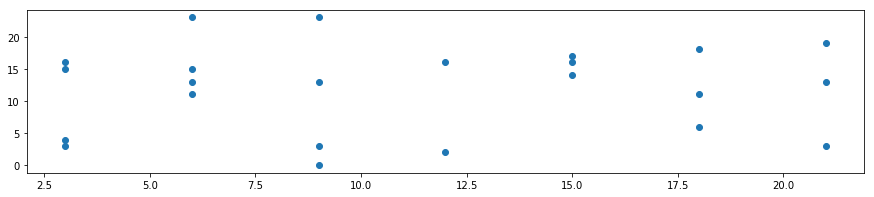

(140, 24)


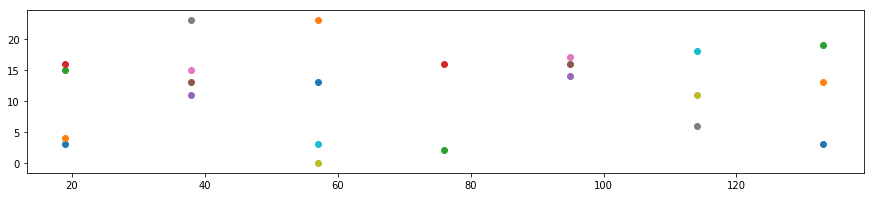

In [88]:
# to check that I converted the time-note labels to LSTM labels correctly

for notes_, label_, spectrogram_ in zip(glob_notes, glob_label, glob_spectrogram):
    print(notes_, label_, spectrogram_)
    
    notes = np.load(notes_)
    label = np.load(label_)
    spectrogram = np.load(spectrogram_)
    
    
    print(np.shape(notes))
    plt.figure(figsize=(15,3))
    plt.scatter(notes[:,0],notes[:,1])
    plt.show()
    
    
    print(np.shape(label))
    plt.figure(figsize=(15,3))
    for i,time_slice in enumerate(label):
        for j,note in enumerate(time_slice):
            if note != 0:
                plt.scatter(i,j)
    plt.show()
    

(108, 3767)
(108, 3767)
(108, 1, 108, 136)
(136, 1, 108, 108)
(1, 108, 108)


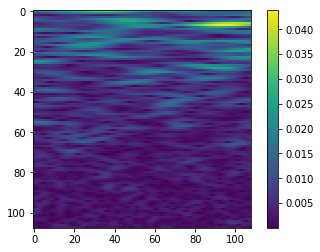

In [89]:
for notes_, label_, spectrogram_ in zip(glob_notes, glob_label, glob_spectrogram):
    print(np.shape(spectrogram))
    print(np.shape(spectrogram[:,:]))
    cnn_inputs = np.array(list(zip([spectrogram[:,i:-108+i:27] for i in range(108)])))
    print(np.shape(cnn_inputs))
    cnn_inputs = np.swapaxes(cnn_inputs,0,3)
    print(np.shape(cnn_inputs))
    cnn_inputs = [cnn_input for cnn_input in cnn_inputs]
    print(np.shape(cnn_inputs[1]))
    plt.imshow(cnn_inputs[7][0,:,:])
    plt.colorbar()
    plt.show()
    

(140, 24)
(20, 24)
(160, 24)
(140, 1, 20, 24)


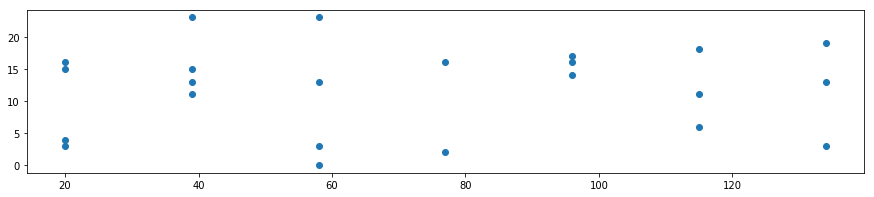

In [90]:
# loading the LSTM labels for comparison

for notes_, label_, spectrogram_ in zip(glob_notes, glob_label, glob_spectrogram):
    print(np.shape(label))
    print(np.shape(np.zeros((20,24))))
    lstm_label = np.append(np.zeros((20,24)),label,axis=0)
    print(np.shape(lstm_label))
    
    lstm_inputs = np.array(list(zip([lstm_label[i:-20+i] for i in range(20)])))
    lstm_inputs = np.swapaxes(lstm_inputs,0,2)
    print(np.shape(lstm_inputs))
    
    plt.figure(figsize=(15,3))
    ground_truth = []
    for i,lstm_input in enumerate(lstm_inputs):
        for time_slice in lstm_input[:,-1,:]:
            for j,note in enumerate(time_slice):
#                 print(note)
                if note != 0:
                    ground_truth.append((i,j))
    
    ground_truth = np.transpose(ground_truth)
    plt.scatter(ground_truth[:][0],ground_truth[:][1])
plt.show()

In [102]:
# transcription with the model

lstm_memory = np.zeros((1,20,24))
predicted_score = []

for i,cnn_input in enumerate(cnn_inputs):
    
#     print(np.shape(cnn_input))
#     print(np.shape(lstm_input))
#     give_prediction(classifier, np.zeros((1,20,24)), np.zeros((1,108,108,1)))
#     print(lstm_input[-1,-1])
#     print(result)
    result = give_prediction(classifier, lstm_memory, cnn_input.reshape((1,108,108,1)))
    lstm_memory[0,:-1] = np.copy(lstm_memory[0,1:])
    lstm_memory[0,-1] = np.copy(result)
    for j, note in enumerate(result[0]):
        if note != 0:
            predicted_score.append([i,j])
predicted_score = np.transpose(predicted_score)

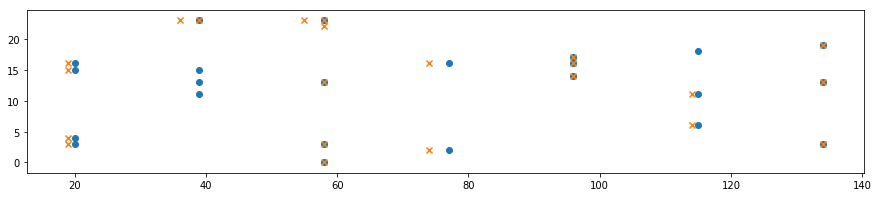

In [103]:
# compare result 
plt.figure(figsize=(15,3))
plt.scatter(ground_truth[0], ground_truth[1], marker='o')
plt.scatter(predicted_score[0], predicted_score[1], marker='x')            
plt.show()

In [101]:
# problem of the training inventising not to predict any notes rather than predict note at the wrong time
### exponential decaying labels
# the debate between onset only labels and label for the entire duration of the note
# 
# hk todo:
# create dataset, put online
# why is it predicting ahead of time? need to look at CNN output
# prolly make the hyperparameters variables 2**7, 108x108, 20x24 for different kind of training